# Chapter 2 : Text Classification and POS Tagging Using NLTK

#### 2.1 no code 

#### 2.2 no code 

#### 2.3 "Text preprocessing and exploratory analysis"

In [4]:
#Tokenization

import nltk
from nltk.corpus import twitter_samples as ts
print("fields of twitter_samples:",ts.fileids())
print("-----------------------------------------------------------------------")

samples_tw = ts.strings('tweets.20150430-223406.json')
print("content of index 20 of twitter_samples:",samples_tw[20])
print("-----------------------------------------------------------------------")


from nltk.tokenize import word_tokenize as wtoken
print("content of index 20 of twitter_samples by word:",wtoken(samples_tw[20]))
print("-----------------------------------------------------------------------")



# using regular expression to remove punctuations 
from nltk import regexp_tokenize
patn = '\w+'
print("content of index 20 of twitter_samples by word after removing punctuations :",regexp_tokenize(samples_tw[20],patn))
print("-----------------------------------------------------------------------")

# using regular expression to remove punctuations that detects words along with a few punctuation characters like ! and -
patn = '\w+|[!,\-,]'
regexp_tokenize(samples_tw[20],patn)
print("content of index 20 of twitter_samples by word after removing punctuations that detects words along with a few punctuation characters ! and - :",regexp_tokenize(samples_tw[20],patn))

fields of twitter_samples: ['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']
-----------------------------------------------------------------------
content of index 20 of twitter_samples: @B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!
-----------------------------------------------------------------------
content of index 20 of twitter_samples by word: ['@', 'B0MBSKARE', 'the', 'anti-Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', '.', 'In', 'practice', 'most', 'people', 'wo', "n't", 'give', 'a', 'toss', '!']
-----------------------------------------------------------------------
content of index 20 of twitter_samples by word after removing punctuations : ['B0MBSKARE', 'the', 'anti', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', 'In', 'practice', 'most', 'people', 'won', 't',

In [5]:
#Stemming

import nltk
from nltk.stem import PorterStemmer
stemming = PorterStemmer()


#stemming the different verb (enjoying, enjoys)
print(stemming.stem("enjoying"))
print("-----------------------------------------------------------------------")
print(stemming.stem("enjoys"))
print("-----------------------------------------------------------------------")

#stemming the adjective (enjoyable)
print(stemming.stem("enjoyable"))
print("-----------------------------------------------------------------------")

print(stemming.stem("variation"))
print(stemming.stem("variate"))

#Here, variat itself is not an English word. The nltk.stem.snowball module includes the snowball stemmers for other different languages, such as French, Spanish, German, and so on.
#Snowball is a stemming language that can be used to create standard rules for stemming in different languages.
#Just such as with tokenizers, we can create custom stemmers, using the following regular expressions:
print("-----------------------------------------------------------------------")

from nltk.stem import RegexpStemmer 
regexp_stemmer = RegexpStemmer("able$|ing$",min=4)
print(regexp_stemmer.stem("flyable"))
print(regexp_stemmer.stem("flying"))





enjoy
-----------------------------------------------------------------------
enjoy
-----------------------------------------------------------------------
enjoy
-----------------------------------------------------------------------
variat
variat
-----------------------------------------------------------------------
fly
fly


In [6]:
#Removing stop words

#show a part of stop words
from nltk.corpus import stopwords
sw_l = stopwords.words('english')
print(sw_l[20:40])
print("-----------------------------------------------------------------------")

#return every word in this sentence if it isn't exist in stopwords
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
print(example_text_without_stopwords)
print("-----------------------------------------------------------------------")

#the percentage of significant words in the text in Shakespeare's Hamlet
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]
len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

#In many of the NLP tasks, these stop words do not have much significance, and therefore, they can be removed during the preprocessing.

['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']
-----------------------------------------------------------------------
['This', 'example', 'sentence', 'test', 'stopwords']
-----------------------------------------------------------------------


69.26124197002142

#### 2.4 Exploratory analysis of text

In [7]:
import nltk
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')
print(len(webtext_sentences))
print(len(webtext_words))

1142
102457


In [8]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [9]:
#get the top 30 words used in the text
frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

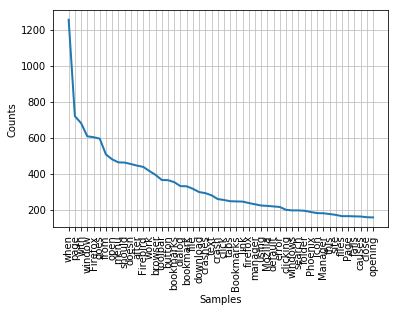

In [10]:
#get the frequency distribution of words with a length greater than 3
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
#show the distribution of frequency counts for the top 50 words
frequency_dist.plot(50,cumulative=False)

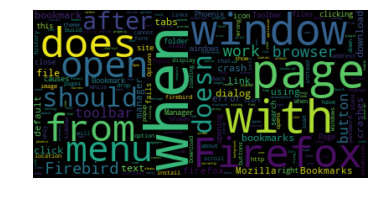

In [11]:
# generate word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text. 
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

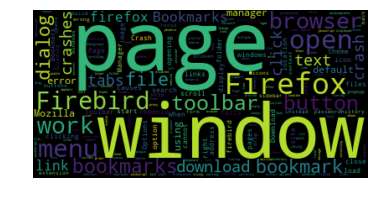

In [12]:
# generate word clouds after removing stop words
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]

frequency_dist = nltk.FreqDist(words_in_webtext_without_sw)

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#check that stopwords like ex. when & from isn't exist
print('when' in words_in_webtext_without_sw)
print('from' in words_in_webtext_without_sw)

False
False


#### 2.5 POS tagging

In [14]:
#What is POS tagging?

from nltk.corpus import brown
print(brown.tagged_words()[30:40])
print("-----------------------------------------------------------------")
print(brown.tagged_words(tagset='universal')[30:40])

[('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD')]
-----------------------------------------------------------------
[('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB')]


In [15]:
#Applications of POS tagging

#an example of word sense disambiguation in the following code.
#In the sentences "I left the room" and "Left of the room"
import nltk
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")
print(nltk.pos_tag(text1,tagset='universal'))
print("---------------------------------------------")
print(nltk.pos_tag(text2, tagset='universal'))


[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]
---------------------------------------------
[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]


In [16]:
#difference between pos & ner chunk
import nltk
example_sent = nltk.word_tokenize("The company is located in South Africa")
print(example_sent)
print("-----------------------------------------------------")
tagged_sent = nltk.pos_tag(example_sent)
print(tagged_sent)
print("-----------------------------------------------------")
print(nltk.ne_chunk(tagged_sent))

['The', 'company', 'is', 'located', 'in', 'South', 'Africa']
-----------------------------------------------------
[('The', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('located', 'VBN'), ('in', 'IN'), ('South', 'NNP'), ('Africa', 'NNP')]
-----------------------------------------------------
(S
  The/DT
  company/NN
  is/VBZ
  located/VBN
  in/IN
  (GPE South/NNP Africa/NNP))


In [33]:
#Training a POS tagger

#how we can extract these features of a sentence
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

#how we can get untagged sentence to use it in training
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

# we will look at the importance of these features after training.
#We will now use the treebank tagged sentences, with the universal tags that 
#we explained in the previous section, as the labeled or training data:

tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')


#We will now extract the features for each tagged sentence in the corpus,
#along with the training labels. The features are stored in the X variable,
#and the POS tags, or labels, are stored in the y variable.
#We will use the following code to extract the features:

def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

X,y = ext_ft(tagged_sentences)


#apply the sKlearn DictVectorizer to convert the feature-value dictionary to training vectors or instances. 

from sklearn.feature_extraction import DictVectorizer
n_sample = 500
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]


# A sample size of around 50,000 sentences was utilized, to speed up the training.
# The training instances are further split into 80% training and 20% test set (refer to the Notebook).
# An ensemble classifier, using RandomForestClassifier from sklearn, is utilized as the POS tagger model, as shown in the following code:

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)


#Before passing it to the predict() function, we will extract the features by using the same function (sentence_features()) that we used for the NLTK labeled data
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)
print("---------------------------------------------")

    
#To evaluate the accuracy, we can predict the POS tags for the test data

from sklearn.metrics import accuracy_score 
predictions = rf.predict(X_test)
accuracy_score=accuracy_score(y_test,predictions)
print(accuracy_score)
print("---------------------------------------------")


#look at the confusion matrix, to observe how well the tagger performs for each of the POS tags

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

#look at the top features of the model
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'NOUN')
('POS', 'NOUN')
('tagger', 'NOUN')
---------------------------------------------
0.83
---------------------------------------------
[('prefix2=th', 0.02942731721620917), ('suffix2=ed', 0.026286827829995953), ('suffix2=,', 0.019613715027259532), ('word=of', 0.016517832485339189), ('prefix2=.', 0.016176386621240418), ('suffix1=,', 0.01586824207800476), ('suffix3=of', 0.013808202582935539), ('prefix3=the', 0.013584443135378854), ('dist_from_last', 0.013017087120568066), ('dist_from_first', 0.012387495074121844), ('prefix1=*', 0.012120887098436419), ('prefix2=Th', 0.011903486155857766), ('word=.', 0.011811359813090385), ('prefix1=,', 0.01146180486720742), ('prefix1=o', 0.01144678206747482), ('word=the', 0.010796014702175904), ('capitalized', 0.0081252451493826032), ('prefix2=,', 0.007976006710895411), ('suffix1=s', 0.0079144333044451759), ('prefix3=0', 0.0077044553222824688)]


#### 2.6 Training a sentiment classifier for movie reviews

In [22]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer


#load the movie reviews based on the sentiment categories, which are either positive or negative
cats = movie_reviews.categories()
reviews = []
for cat in cats:
    for fid in movie_reviews.fileids(cat):
        review = (list(movie_reviews.words(fid)),cat)
        reviews.append(review)
# use random.shuffle() function to convert the grouped positive and negative reviews into a random order.
random.shuffle(reviews)

#select the top words in the reviews
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words())
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0]

#we will assign 1 at positions where the corresponding word is present in the review, and 0 otherwise
def ext_ft(review,top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

#Each movie review is passed to the ext_ft() function, which returns the binary features in a dictionary.
#We will pass each review to the ext_ft()
featuresets = [(ext_ft(d,top_wd_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]

classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
print("---------------------------------------------")

#we will view the top 20 most important features
classifier.show_most_informative_features(10)

#vectorize the features using DictVectorizer, as we did in the previous section for training a POS tagger
dict_vectorizer=None
def get_train_test(train_set,test_set):
    global dict_vectorizer
    dict_vectorizer = DictVectorizer(sparse=False)
    X_train, y_train = zip(*train_set)
    X_train = dict_vectorizer.fit_transform(X_train)
    X_test,y_test = zip(*test_set)
    X_test = dict_vectorizer.transform(X_test)
    return X_train,X_test,y_train,y_test

#The get_train_test function returns the vectorized features that can be passed to sklearn's random forest classifier
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

#The n_jobs parameter is the number of parallel jobs, for faster training and prediction
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print("---------------------------------------------")

#remove all of the stop words in the reviews
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
all_words_in_reviews = nltk.FreqDist(word.lower() for word in movie_reviews.words() if word not in stopwords_list)
top_words_in_reviews = [list(words) for words in zip(*all_words_in_reviews.most_common(2000))][0]

featuresets = [(ext_ft(d,top_words_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)

rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

#excludes the stop words. Again, we will generate the features using this as our vocabulary and train a random forest classifie
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print("---------------------------------------------")

#The stop word removal for this dataset has not improved the model's accuracy, but has,
#in fact, reduced it. We can look at the most informative feature, 
#as we did for the Naive Bayes classifier
features_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
features_list = sorted(features_list, key=lambda x: x[1], reverse=True)
print(features_list[0:20])
print("---------------------------------------------")


0.825
---------------------------------------------
Most Informative Features
word_present(outstanding) = True              pos : neg    =     10.5 : 1.0
     word_present(mulan) = True              pos : neg    =      8.4 : 1.0
word_present(wonderfully) = True              pos : neg    =      7.4 : 1.0
     word_present(damon) = True              pos : neg    =      7.3 : 1.0
    word_present(seagal) = True              neg : pos    =      6.6 : 1.0
     word_present(awful) = True              neg : pos    =      5.6 : 1.0
      word_present(lame) = True              neg : pos    =      5.6 : 1.0
word_present(ridiculous) = True              neg : pos    =      5.5 : 1.0
    word_present(wasted) = True              neg : pos    =      5.2 : 1.0
     word_present(flynt) = True              pos : neg    =      5.0 : 1.0
0.855
---------------------------------------------
0.835
---------------------------------------------
[('word_present(bad)', 0.013065863422992723), ('word_present(worst

#### 2.7 Training a bag-of-words classifier

In [28]:
import random
import nltk
from nltk.corpus import twitter_samples
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# The JSON parsing and text extraction are done by NLTK, 
# with the strings function. We attach the sentiment label, 1 ,to denote positive sentiment,
# and 0 to denote negative sentiment. We also shuffle the order of the positive and negative sentiments
# in the Python list of tweets and sentiment label tuples

pos_tweets = [(string, 1) for string in twitter_samples.strings('positive_tweets.json')]
neg_tweets = [(string,0) for string in twitter_samples.strings('negative_tweets.json')]
pos_tweets.extend(neg_tweets)
comb_tweets = pos_tweets
random.shuffle(comb_tweets)
tweets,labels = (zip(*comb_tweets))

# We utilize the CountVectorizer, in sklearn, to generate the features.
# We limit the number of features to 10000. We also use both unigram and bigram features.
# An n-gram denotes n number of contiguous word features sampled from the text.
# A unigram is the usual single word feature, and a bigram is two consecutive word sequences in the text.
# As bigrams are two consecutive words, they can capture short word sequences or phrases in the text.
# In this example, as ngram_range is (1, 2), CountVectorizer will extract both unigram and bigrams features from the tweets.
count_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=10000)
X = count_vectorizer.fit_transform(tweets)

#train the model with the tweets, after splitting it into 80% training and 20% test sets
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)


#evaluate the model with the test set to predict the sentiment labels, printing the accuracy score and confusion matrix
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

#using tfidf to get weights of the words based on their appearances in all of the documents or text
from nltk.corpus import stopwords
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=10000)
X = tfidf.fit_transform(tweets)

#we extract both unigram and bigram features from the text. We will evaluate this model based on the test data
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

#TfidfVectorizer, in this case, has not improved the model's accuracy.
#We will now remove the stop words from the tweets, using the NLTK stop words corpora
from nltk.corpus import stopwords
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=10000, stop_words=stopwords.words('english'))
X = tfidf.fit_transform(tweets)

preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

# An evaluation of the test data shows a reduction in the model's accuracy.
# Removing stop words may not always improve the accuracy, and accuracy also depends on the training data.
# It is possible that specific stop words occur across some common phrases that are good indicators of a tweet's sentiment. 

0.749
[[804 209]
 [293 694]]
0.749
[[804 209]
 [293 694]]
0.749
[[804 209]
 [293 694]]
